********
# <center><font color=#41523A><strong>Census Data Analysis Project<strong><font></center>
#### <center><font color=#41523A><strong>-By: Murphy Nnamdi Ochuba<strong><font></center>
********

### Project Summary:
In this project, we analyse a mock Census Dataset of over 9400 records.
The aim is to find useful trends and insights in the dataset and make recommendations to the government on the best place to channel developmental efforts.
We begin by carrying out various data cleaning and preprocessing steps, then we go ahead to analyse the data using matplotlib and seaborn to create rich visualisations.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re #regex for matching keywords. We use this for occupation categorisation later on
import seaborn as sns

In [2]:
# Load census data
original_census_data = pd.read_csv('census01.csv')

# Create a duplicate copy of the data for cleaning. 
# This way, we preserve the original copy as ground truth for future analysis
cleaned_census_data = original_census_data.copy()

In [3]:
# Inspect the data (Output shows us first 5 and last 5 data rows, 
# giving us an idea of the available fields as well as the values that they contain)
original_census_data 

House Number        Street   First Name    Surname Age  \
0                1  Allen Circle         John      Grant  43   
1                1  Allen Circle          Kim      Grant  37   
2                2  Allen Circle        Sally   Atkinson  44   
3                2  Allen Circle         Karl  Robertson  44   
4                2  Allen Circle        Tracy   Atkinson  24   
...            ...           ...          ...        ...  ..   
9400             1   Perth Abbey     Lorraine    Collier  50   
9401             1   Perth Abbey  Christopher    Collier  54   
9402             1   Perth Abbey     Clifford    Collier  22   
9403             1   Perth Abbey       Joanne    Collier  16   
9404             1   Perth Abbey      Natasha    Collier  16   

     Relationship to Head of House Marital Status  Gender  \
0                             Head        Married    Male   
1                             Wife        Married  Female   
2                             Head         Single  Female   
3                          Partner         Single    Male   
4                         Daughter         Single  Female   
...                            ...            ...     ...   
9400                          Head        Married  Female   
9401                       Husband        Married    Male   
9402                           Son         Single    Male   
9403                      Daughter            NaN  Female   
9404                      Daughter            NaN  Female   

                                        Occupation Infirmity   Religion  
0                    Operational investment banker       NaN        NaN  
1                             Intelligence analyst       NaN        NaN  
2     Production designer, theatre/television/film       NaN  Christian  
3                                 Paediatric nurse       NaN  Christian  
4                            Child psychotherapist       NaN  Christian  
...                                            ...       ...        ...  
9400  Lighting technician, broadcasting/film/video       NaN  Christian  
9401                        Amenity horticulturist       NaN  Christian  
9402                            University Student       NaN        NaN  
9403                                       Student       NaN        NaN  
9404                                       Student       NaN        NaN  

[9405 rows x 11 columns]

In [4]:
# Remove duplicate entries if any
original_census_data.drop_duplicates()

House Number        Street   First Name    Surname Age  \
0                1  Allen Circle         John      Grant  43   
1                1  Allen Circle          Kim      Grant  37   
2                2  Allen Circle        Sally   Atkinson  44   
3                2  Allen Circle         Karl  Robertson  44   
4                2  Allen Circle        Tracy   Atkinson  24   
...            ...           ...          ...        ...  ..   
9400             1   Perth Abbey     Lorraine    Collier  50   
9401             1   Perth Abbey  Christopher    Collier  54   
9402             1   Perth Abbey     Clifford    Collier  22   
9403             1   Perth Abbey       Joanne    Collier  16   
9404             1   Perth Abbey      Natasha    Collier  16   

     Relationship to Head of House Marital Status  Gender  \
0                             Head        Married    Male   
1                             Wife        Married  Female   
2                             Head         Single  Female   
3                          Partner         Single    Male   
4                         Daughter         Single  Female   
...                            ...            ...     ...   
9400                          Head        Married  Female   
9401                       Husband        Married    Male   
9402                           Son         Single    Male   
9403                      Daughter            NaN  Female   
9404                      Daughter            NaN  Female   

                                        Occupation Infirmity   Religion  
0                    Operational investment banker       NaN        NaN  
1                             Intelligence analyst       NaN        NaN  
2     Production designer, theatre/television/film       NaN  Christian  
3                                 Paediatric nurse       NaN  Christian  
4                            Child psychotherapist       NaN  Christian  
...                                            ...       ...        ...  
9400  Lighting technician, broadcasting/film/video       NaN  Christian  
9401                        Amenity horticulturist       NaN  Christian  
9402                            University Student       NaN        NaN  
9403                                       Student       NaN        NaN  
9404                                       Student       NaN        NaN  

[9404 rows x 11 columns]

In [5]:
# We can see that there are no duplicate entries as the number of records remains the same.

In [6]:
# Check for columns with null values
original_census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9405 entries, 0 to 9404
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   9405 non-null   int64 
 1   Street                         9405 non-null   object
 2   First Name                     9405 non-null   object
 3   Surname                        9405 non-null   object
 4   Age                            9405 non-null   object
 5   Relationship to Head of House  8710 non-null   object
 6   Marital Status                 7171 non-null   object
 7   Gender                         9405 non-null   object
 8   Occupation                     9405 non-null   object
 9   Infirmity                      63 non-null     object
 10  Religion                       4013 non-null   object
dtypes: int64(1), object(10)
memory usage: 808.4+ KB


In [7]:
# This shows that we have null values in the following columns:
# 1. Relationship to Head of House
# 2. Marital Status
# 3. Infirmity
# 4. Religion

### Next we check all the columns one after the other to know which ones require cleaning
We will check for the following errors:
1. Nulls
2. Duplicates
3. Data in different formats (e.g. string in an integer column)
4. Leading and trailing white spaces
5. Erroneous/invalid values
6. Same category captured in different ways (e.g. Male, M, Female, F)
7. Consistency in units <br>
We may also input new values where applicable

In [8]:
# Inspect the house number column
original_census_data['House Number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [9]:
# The house number column doesn't seem to contain erroneous values so we can move ahead

In [10]:
# Inspect the Street column
original_census_data['Street'].unique()

array(['Allen Circle', 'Calendar Mill', 'Aberdeen Avenue',
       'Mace Trafficway', 'Ward Lane', 'Atholl Bridge', 'Salmon Street',
       'White Haven', 'Mace Green', 'Whittaker Crescent',
       'Brown Crescent', 'Owen Road', 'Sunderland Avenue',
       'Cross Islands', 'Johnson Ranch', 'Begum Track', 'Walters Road',
       'William Avenue', 'Exchange Drive', 'Smith Hill', 'Smith Lane',
       'Smith Squares', 'Atlantis Drive', 'Gloucester Street',
       'Queen Dam', 'Hewitt Ports', 'Paladin Prairie', 'Shilling Road',
       'Coconutcross Drive', 'Powys Lane', 'St.Mark Oval', 'King Lane',
       'Rhubarbshot Street', 'Murray Avenue', 'South Avenue',
       'Castor Route', 'Guardian Drive', 'Summer Mission',
       'Yucca Villages', 'Moran Port', 'Johnston Drive', 'Gallows Locks',
       'Penny Avenue', 'Fleet Drive', 'Goodluck Harbors', 'Brown Rue',
       'Phillips Court', 'Cougar Lane', 'Ryan Oval', 'Daniels Lane',
       'Willis Lane', 'Railway Crescent', 'Sutton Crescent',
     

In [11]:
# Inspect the Street column
original_census_data[original_census_data['Street'] == ' ']

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

In [12]:
# Inspect the Street column
original_census_data[original_census_data['Street']== 'None']

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

In [13]:
# Inspect the Street column
original_census_data[original_census_data['Street'].isna()]

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

In [14]:
# The Street column also looks good

In [15]:
original_census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9405 entries, 0 to 9404
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   9405 non-null   int64 
 1   Street                         9405 non-null   object
 2   First Name                     9405 non-null   object
 3   Surname                        9405 non-null   object
 4   Age                            9405 non-null   object
 5   Relationship to Head of House  8710 non-null   object
 6   Marital Status                 7171 non-null   object
 7   Gender                         9405 non-null   object
 8   Occupation                     9405 non-null   object
 9   Infirmity                      63 non-null     object
 10  Religion                       4013 non-null   object
dtypes: int64(1), object(10)
memory usage: 808.4+ KB


In [16]:
original_census_data.describe(include='all')

House Number      Street First Name Surname   Age  \
count    9405.000000        9405       9405    9405  9405   
unique           NaN         105        364     671   118   
top              NaN  Mace Green    Charles   Smith    41   
freq             NaN         751         47     288   196   
mean       45.870175         NaN        NaN     NaN   NaN   
std        50.376482         NaN        NaN     NaN   NaN   
min         1.000000         NaN        NaN     NaN   NaN   
25%        11.000000         NaN        NaN     NaN   NaN   
50%        27.000000         NaN        NaN     NaN   NaN   
75%        57.000000         NaN        NaN     NaN   NaN   
max       224.000000         NaN        NaN     NaN   NaN   

       Relationship to Head of House Marital Status  Gender Occupation  \
count                           8710           7171    9405       9405   
unique                            20              5       2       1096   
top                             Head         Single  Female    Student   
freq                            3329           3209    4958       1843   
mean                             NaN            NaN     NaN        NaN   
std                              NaN            NaN     NaN        NaN   
min                              NaN            NaN     NaN        NaN   
25%                              NaN            NaN     NaN        NaN   
50%                              NaN            NaN     NaN        NaN   
75%                              NaN            NaN     NaN        NaN   
max                              NaN            NaN     NaN        NaN   

                  Infirmity   Religion  
count                    63       4013  
unique                    7         13  
top     Physical Disability  Christian  
freq                     15       2101  
mean                    NaN        NaN  
std                     NaN        NaN  
min                     NaN        NaN  
25%                     NaN        NaN  
50%                     NaN        NaN  
75%                     NaN        NaN  
max                     NaN        NaN

In [17]:
# Inspect the First Name column
original_census_data['First Name'].unique()

array(['John', 'Kim', 'Sally', 'Karl', 'Tracy', 'Howard', 'Catherine',
       'Owen', 'Neil', 'Emily', 'Rita', 'Denis', 'Malcolm', 'Gillian',
       'Lucy', 'Max', 'Katherine', 'Beverley', 'Craig', 'Elaine', 'Glenn',
       'June', 'Lewis', 'Guy', 'Maureen', 'Charles', 'Luke', 'Jason',
       'Shane', 'Leah', 'Norman', 'Helen', 'Danielle', 'Mohammad',
       'Mohammed', 'Sophie', 'Melissa', 'Joan', 'Abbie', 'Cheryl',
       'Alexander', 'Leanne', 'Terry', 'Benjamin', 'Kathleen', 'Katie',
       'Emma', 'Tony', 'Kimberley', 'Dylan', 'Ashleigh', 'Natalie',
       'Lindsey', 'Patrick', 'Michelle', 'Joyce', 'Clare', 'Frances',
       'Tracey', 'Kerry', 'Dennis', 'Eileen', 'Allan', 'Vanessa',
       'Michael', 'Stuart', 'Marie', 'Joe', 'Hannah', 'Bryan', 'Harriet',
       'Ian', 'Naomi', 'Gerard', 'Kayleigh', 'Phillip', 'Karen', 'Dean',
       'Francesca', 'Shannon', 'Samantha', 'Philip', 'Carole', 'Nigel',
       'Jasmine', 'Stephen', 'Hayley', 'Diane', 'Joel', 'Duncan',
       'Brandon', 

In [18]:
original_census_data[original_census_data['First Name'] == ' ']

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

In [19]:
# looks good!

In [20]:
# Inspect the Surname column
original_census_data['Surname'].unique()

array(['Grant', 'Atkinson', 'Robertson', 'Bradley', 'Davies', 'Godfrey',
       'Thomas', 'Ward', 'Williamson', 'Simmons', 'Griffin', 'Taylor',
       'Smith', 'Cox', 'Todd', 'Mahmood', 'Hall', 'Chapman', 'Baker',
       'Jones', 'Doherty', 'Booth', 'Johnson', 'Williams', 'Brown',
       'Owen', 'Martin', 'Walker', 'Evans', 'Green', 'McCarthy',
       'Begum-McCarthy', 'Kelly', 'Hodgson', 'Wright', 'Lewis', 'Gibbs',
       'Ashton-Gibbs', 'Pearson', 'Woodward', 'Wall', 'Elliott', 'Wells',
       'Franklin', 'Gardiner', 'Read', 'Bishop', 'Herbert', 'Webb',
       'Sanderson', 'Young', 'Tomlinson', 'Fisher', 'Perry', 'Fox',
       'Peters-Shepherd', 'King', 'Faulkner', 'Goddard', 'Day', 'Barnes',
       'Moore', 'Little', 'Kirk', "O'Neill", 'Cooke', 'Lynch',
       'Law-Fisher', 'Thompson', 'Morgan', 'Greenwood', 'Payne', 'Doyle',
       'Phillips', 'Ryan', 'Ball', 'Howarth', 'Rogers-Holmes', 'Marshall',
       'Allen', 'Spencer', 'Blackburn', 'Reed', 'Henry', 'Hamilton',
       'James',

In [21]:
original_census_data[original_census_data['Surname'] == ' ']

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

### Cleaning the 'Age' column

In [22]:
# Inspect the Age column
original_census_data['Age'].unique()

array(['43', '37', '44', '24', '13', '50', '14', '10', '29', '0', '56',
       '46', '11', '42', '4', '1', '57', '58', '12', '59', '65', '20',
       '45', '39', '34', '31', '28', '21', '9', '7', '51', '22', '2',
       '61', '32', '17', '72', '40', '16', '3', '23', '76', '35', '52',
       '53', '26', '47', '15', '33', '55', '38', '41', '8', '18', '19',
       '36', '69', '60', '5', '84', '63', '88', '71', '49', '74', '25',
       '48', '67', '66', '70', '83', '80', '54', '98', '64', '6', '86',
       '27', '30', '62', '73', '79', '81', '78', '68', ' ', '75', '82',
       '89', '87', '91', '85', '77', '99', '102', '92', '104', '100',
       '90', '95', '96', '97', '105', '103', '101', '94', '93',
       '51.589355621448114', '53.589355621448114', '7.0', '3.0', '1.0',
       '107', '61.14390708730485', '10.0', '9.0', '6.0', '2.0'],
      dtype=object)

In [23]:
# We can see that the age column contains some errors.
# The ages are expressed as strings and some of them are floats instead of integers
# Also, we notice some blanks.

In [24]:
# Let's start by investigating the blank ages

In [25]:
original_census_data[original_census_data['Age'] == ' ']

House Number           Street First Name Surname Age  \
656           125  Aberdeen Avenue       Mary  Miller       

    Relationship to Head of House Marital Status  Gender Occupation Infirmity  \
656                      Daughter            NaN  Female      Child       NaN   

    Religion  
656      NaN

In [26]:
#Just one record has a blank age and we see that she is a child.

In [27]:
# Create a fallback checkpoint copy of the dataframe before inputing data
cleaned_census_data = original_census_data.copy()

In [28]:
children_populace = original_census_data[original_census_data['Occupation'] == 'Child']

In [29]:
#Based on this, we can fill in the child's age with the modal age

In [30]:
# Find the modal child age
modal_child_age = children_populace['Age'].mode().iloc[0]
modal_frequency = children_populace['Age'].value_counts().max()

freq = children_populace['Age'].value_counts()

# Print the mode
print("Modal child age':", modal_child_age)
print("Frequency:", modal_frequency)

Modal child age': 4
Frequency: 113


In [31]:
# Replace the child's age with the modal_frequency

original_census_data['Age'] = original_census_data['Age'].replace(' ', modal_child_age)

In [32]:
# Check for empty ages again
original_census_data[original_census_data['Age'] == ' ']

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

In [33]:
# Double-check the altered row
original_census_data.iloc[[656]]

House Number           Street First Name Surname Age  \
656           125  Aberdeen Avenue       Mary  Miller   4   

    Relationship to Head of House Marital Status  Gender Occupation Infirmity  \
656                      Daughter            NaN  Female      Child       NaN   

    Religion  
656      NaN

In [34]:
# We see that the age has been changed to 4

In [35]:
# Next, we convert all age values to integers
original_census_data['Age'] = original_census_data['Age'].astype(float).astype(int)
# Inspect the age column again
original_census_data['Age'].unique()

array([ 43,  37,  44,  24,  13,  50,  14,  10,  29,   0,  56,  46,  11,
        42,   4,   1,  57,  58,  12,  59,  65,  20,  45,  39,  34,  31,
        28,  21,   9,   7,  51,  22,   2,  61,  32,  17,  72,  40,  16,
         3,  23,  76,  35,  52,  53,  26,  47,  15,  33,  55,  38,  41,
         8,  18,  19,  36,  69,  60,   5,  84,  63,  88,  71,  49,  74,
        25,  48,  67,  66,  70,  83,  80,  54,  98,  64,   6,  86,  27,
        30,  62,  73,  79,  81,  78,  68,  75,  82,  89,  87,  91,  85,
        77,  99, 102,  92, 104, 100,  90,  95,  96,  97, 105, 103, 101,
        94,  93, 107])

In [36]:
# The age column looks good now

### Cleaning the 'Relationship to Head of House' column

In [37]:
# Inspect the Age column
original_census_data['Relationship to Head of House'].unique()

array(['Head', 'Wife', 'Partner', 'Daughter', 'Son', 'Adopted Son',
       'Lodger', 'Husband', 'Visitor', nan, 'Grandson', 'Granddaughter',
       'Adopted Daughter', 'Step-Son', 'Step-Daughter', 'Nephew', 'Neice',
       'Sibling', ' ', 'Cousin', 'Son-in-law'], dtype=object)

#### We see two erroneous values here:

1. ' '
2. None

Let's inspect further to get more insights into the erroneous values

In [38]:
original_census_data[original_census_data['Relationship to Head of House'] == ' ']

House Number      Street First Name   Surname  Age  \
1179            69  Mace Green      Emily  Sullivan    0   

     Relationship to Head of House Marital Status  Gender Occupation  \
1179                                          NaN  Female      Child   

     Infirmity Religion  
1179       NaN      NaN

In [39]:
# From the first name, occupation, and gender, we can easily infer that this person is likely a daughter, 
# step-daughter or granddaughter.
# We look more closely into the other residents of that house:

original_census_data[(original_census_data['House Number'] == 69) & (original_census_data['Street'] == 'Mace Green')]

House Number      Street First Name   Surname  Age  \
1176            69  Mace Green      Lynda  Sullivan   39   
1177            69  Mace Green     Lesley  Sullivan    6   
1178            69  Mace Green      Diane  Sullivan    4   
1179            69  Mace Green      Emily  Sullivan    0   

     Relationship to Head of House Marital Status  Gender  \
1176                          Head         Single  Female   
1177                      Daughter            NaN  Female   
1178                      Daughter            NaN  Female   
1179                                          NaN  Female   

                     Occupation Infirmity Religion  
1176  Teacher, secondary school       NaN      NaN  
1177                    Student       NaN      NaN  
1178                      Child       NaN      NaN  
1179                      Child       NaN      NaN

In [40]:
# Based on this information, the head of house appears to be a single mother who has little children and is 
# relatively too young to be a grandmother 
# The most likely inference here is that Emily is her daughter and so we fill in the relationship accordingly.

In [41]:
original_census_data.loc[(original_census_data.index == 1179), 'Relationship to Head of House'] = 'Daughter'
original_census_data.loc[[1179]] # Inspect again

House Number      Street First Name   Surname  Age  \
1179            69  Mace Green      Emily  Sullivan    0   

     Relationship to Head of House Marital Status  Gender Occupation  \
1179                      Daughter            NaN  Female      Child   

     Infirmity Religion  
1179       NaN      NaN

In [42]:
# Next we inspect the rows that are None
original_census_data[original_census_data['Relationship to Head of House'] == 'None']

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

In [43]:
# Check for blanks
original_census_data[original_census_data['Relationship to Head of House'] == ' ']

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

In [44]:
# We also inspect the rows that are NaN
original_census_data[original_census_data['Relationship to Head of House'].isna()]

House Number        Street First Name   Surname  Age  \
55              15  Allen Circle      Dylan   Johnson   32   
56              15  Allen Circle    Charles  Williams   24   
57              15  Allen Circle    Maureen     Brown   42   
118             33  Allen Circle    Vanessa  Franklin   21   
119             33  Allen Circle        Amy  Gardiner   19   
...            ...           ...        ...       ...  ...   
9390             1  Polaris Barn    Malcolm   Freeman   41   
9391             1  Polaris Barn    Melissa    Martin   46   
9392             1  Polaris Barn       Sara     White   28   
9393             1  Polaris Barn      Conor     Jones   61   
9394             1  Polaris Barn    Russell     Baker   19   

     Relationship to Head of House Marital Status  Gender  \
55                             NaN         Single    Male   
56                             NaN         Single    Male   
57                             NaN         Single  Female   
118                            NaN         Single  Female   
119                            NaN         Single  Female   
...                            ...            ...     ...   
9390                           NaN         Single    Male   
9391                           NaN         Single  Female   
9392                           NaN         Single  Female   
9393                           NaN         Single    Male   
9394                           NaN         Single    Male   

                       Occupation Infirmity   Religion  
55         Recruitment consultant       NaN   Catholic  
56                    Comptroller       NaN     Muslim  
57       Advertising art director       NaN        NaN  
118            University Student       NaN     Muslim  
119            University Student       NaN  Methodist  
...                           ...       ...        ...  
9390             Ambulance person       NaN        NaN  
9391  Health promotion specialist       NaN  Christian  
9392       Psychologist, forensic       NaN        NaN  
9393          Automotive engineer       NaN  Christian  
9394           University Student       NaN  Christian  

[695 rows x 11 columns]

In [45]:
# We see that as much as 695 rows are specified as 'NaN' meaning that they have no relationship with the head of house

In [46]:
original_census_data[original_census_data['Relationship to Head of House'].isna()].head(50)

House Number           Street First Name    Surname  Age  \
55             15     Allen Circle      Dylan    Johnson   32   
56             15     Allen Circle    Charles   Williams   24   
57             15     Allen Circle    Maureen      Brown   42   
118            33     Allen Circle    Vanessa   Franklin   21   
119            33     Allen Circle        Amy   Gardiner   19   
120            33     Allen Circle    Chelsea       Read   20   
153             6    Calendar Mill   Jonathan      Perry   34   
154             6    Calendar Mill   Victoria     Thomas   20   
177            17    Calendar Mill    Shirley    Pearson   38   
178            17    Calendar Mill    Stephen      Smith   53   
220            33    Calendar Mill     Hayley    Spencer   52   
221            33    Calendar Mill     Amelia  Blackburn   34   
222            33    Calendar Mill        Joe       Reed   64   
273             7  Aberdeen Avenue       Kyle       Bell   30   
274             7  Aberdeen Avenue     Andrew    Roberts   22   
275             7  Aberdeen Avenue    Raymond    Collins   19   
276             7  Aberdeen Avenue      Janet     Barber   21   
332            26  Aberdeen Avenue     Martyn    Baldwin   33   
333            26  Aberdeen Avenue       Kyle     Barber   58   
334            26  Aberdeen Avenue   Ashleigh       Gray   44   
396            45  Aberdeen Avenue   Geoffrey       Ford   18   
409            50  Aberdeen Avenue      Paula      Lucas   41   
410            50  Aberdeen Avenue     Elaine     Parker   56   
411            50  Aberdeen Avenue      Brett      Cross   48   
412            50  Aberdeen Avenue     Yvonne     Norman   24   
433            58  Aberdeen Avenue     Marian     Walker   45   
434            58  Aberdeen Avenue   Mohammad     George   49   
454            64  Aberdeen Avenue      Conor      Allen   44   
455            64  Aberdeen Avenue      Diana     Taylor   44   
468            68  Aberdeen Avenue      Carly      Stone   19   
469            68  Aberdeen Avenue    Natalie     Palmer   50   
498            78  Aberdeen Avenue   Michelle      Craig   34   
499            78  Aberdeen Avenue      Kevin    Johnson   33   
500            78  Aberdeen Avenue     Martin      Jones   50   
508            81  Aberdeen Avenue   Victoria       Kirk   21   
509            81  Aberdeen Avenue      Roger  Parkinson   22   
557            94  Aberdeen Avenue    Patrick      Evans   34   
558            94  Aberdeen Avenue      Emily      Mills   32   
559            94  Aberdeen Avenue     Stuart     Wright   39   
561            95  Aberdeen Avenue     Gerard       Wood   36   
562            95  Aberdeen Avenue       Jack      Blake   53   
564            96  Aberdeen Avenue       Carl      Tyler   33   
565            96  Aberdeen Avenue      Peter     Conway   22   
631           118  Aberdeen Avenue     Damian      Young   31   
632           118  Aberdeen Avenue      Laura      Evans   27   
633           118  Aberdeen Avenue       Emma      Watts   54   
669           129  Aberdeen Avenue   Jonathan  Robertson   50   
670           129  Aberdeen Avenue    Douglas   Morrison   45   
671           129  Aberdeen Avenue       Kate      Young   20   
672           129  Aberdeen Avenue     Denise    Edwards   35   

    Relationship to Head of House Marital Status  Gender  \
55                            NaN         Single    Male   
56                            NaN         Single    Male   
57                            NaN         Single  Female   
118                           NaN         Single  Female   
119                           NaN         Single  Female   
120                           NaN         Single  Female   
153                           NaN         Single    Male   
154                           NaN         Single  Female   
177                           NaN         Single  Female   
178                           NaN         Single    Male   
220                          

In [47]:
# On inspection, most of the records whose 'Relationship to Head of House' column are unspecified 
# appear to have no relationship with the head of house.
# I would infer that they may be tenants. We are not given any information about the context of 'Lodgers' 
# So we can't safely assume that lodgers and tenants are the same. Lodgers may be for the short-term like AirBnB, 
# While tenants may be for the longer term.
# Also, if the need arises in the future to treat both categories as one, we can decide to create a duplicate dataset 
# to handle this case.
# On this premise, we create a new category called 'Tenant' which includes all the house members whose 
# 'Relationship to Head of House' column 
# is unspecified, and who are considered unrelated to the head of house (based on the difference in surnames).

In [48]:
condition = original_census_data['Relationship to Head of House'].isna()

original_census_data.loc[condition, 'Relationship to Head of House'] = 'Tenant'

original_census_data[original_census_data['Relationship to Head of House'] == 'Tenant']

House Number        Street First Name   Surname  Age  \
55              15  Allen Circle      Dylan   Johnson   32   
56              15  Allen Circle    Charles  Williams   24   
57              15  Allen Circle    Maureen     Brown   42   
118             33  Allen Circle    Vanessa  Franklin   21   
119             33  Allen Circle        Amy  Gardiner   19   
...            ...           ...        ...       ...  ...   
9390             1  Polaris Barn    Malcolm   Freeman   41   
9391             1  Polaris Barn    Melissa    Martin   46   
9392             1  Polaris Barn       Sara     White   28   
9393             1  Polaris Barn      Conor     Jones   61   
9394             1  Polaris Barn    Russell     Baker   19   

     Relationship to Head of House Marital Status  Gender  \
55                          Tenant         Single    Male   
56                          Tenant         Single    Male   
57                          Tenant         Single  Female   
118                         Tenant         Single  Female   
119                         Tenant         Single  Female   
...                            ...            ...     ...   
9390                        Tenant         Single    Male   
9391                        Tenant         Single  Female   
9392                        Tenant         Single  Female   
9393                        Tenant         Single    Male   
9394                        Tenant         Single    Male   

                       Occupation Infirmity   Religion  
55         Recruitment consultant       NaN   Catholic  
56                    Comptroller       NaN     Muslim  
57       Advertising art director       NaN        NaN  
118            University Student       NaN     Muslim  
119            University Student       NaN  Methodist  
...                           ...       ...        ...  
9390             Ambulance person       NaN        NaN  
9391  Health promotion specialist       NaN  Christian  
9392       Psychologist, forensic       NaN        NaN  
9393          Automotive engineer       NaN  Christian  
9394           University Student       NaN  Christian  

[695 rows x 11 columns]

In [49]:
original_census_data['Relationship to Head of House'].unique()

array(['Head', 'Wife', 'Partner', 'Daughter', 'Son', 'Adopted Son',
       'Lodger', 'Husband', 'Visitor', 'Tenant', 'Grandson',
       'Granddaughter', 'Adopted Daughter', 'Step-Son', 'Step-Daughter',
       'Nephew', 'Neice', 'Sibling', 'Cousin', 'Son-in-law'], dtype=object)

In [50]:
checker_data = original_census_data.copy()

In [51]:
# Check if any head of house is under 18 - Based on the requirements, heads of house must be above 18
condition = (original_census_data['Relationship to Head of House'] == 'Head') & \
            (original_census_data['Age'] < 18)

original_census_data[condition]

House Number              Street First Name Surname  Age  \
3753            41  Rhubarbshot Street      Carol   Smith   16   
7525           155         Allen Manor      Julie   Jones   16   

     Relationship to Head of House Marital Status  Gender Occupation  \
3753                          Head       Divorced  Female    Student   
7525                          Head        Married  Female    Student   

     Infirmity Religion  
3753       NaN      NaN  
7525       NaN      NaN

In [52]:
# We inspect surrounding data for cues

In [53]:
original_census_data.loc[3752:3757]

House Number              Street First Name     Surname  Age  \
3752            40  Rhubarbshot Street      James    Hamilton   21   
3753            41  Rhubarbshot Street      Carol       Smith   16   
3754            41  Rhubarbshot Street       Jean     Johnson   40   
3755            41  Rhubarbshot Street       Mark  Hutchinson   23   
3756            41  Rhubarbshot Street     Andrea       Myers   40   
3757            42  Rhubarbshot Street   Kayleigh       Adams   82   

     Relationship to Head of House Marital Status  Gender  \
3752                       Partner         Single    Male   
3753                          Head       Divorced  Female   
3754                        Lodger         Single  Female   
3755                        Lodger         Single    Male   
3756                        Cousin         Single  Female   
3757                          Head       Divorced  Female   

                             Occupation Infirmity   Religion  
3752                 University Student       NaN        NaN  
3753                            Student       NaN        NaN  
3754  Planning and development surveyor       NaN        NaN  
3755                    Music therapist       NaN  Methodist  
3756    Television production assistant       NaN   Catholic  
3757                Retired Music tutor       NaN        NaN

In [54]:
original_census_data.loc[7524:7529]

House Number       Street First Name Surname  Age  \
7524           154  Allen Manor      Derek   Baker   33   
7525           155  Allen Manor      Julie   Jones   16   
7526           155  Allen Manor       Kyle   Jones   19   
7527           155  Allen Manor      Ellie   White   54   
7528           155  Allen Manor       Eric   James   44   
7529           156  Allen Manor     Elaine   Kelly   47   

     Relationship to Head of House Marital Status  Gender  \
7524                           Son         Single    Male   
7525                          Head        Married  Female   
7526                       Husband        Married    Male   
7527                        Lodger         Single  Female   
7528                        Lodger         Single    Male   
7529                          Head       Divorced  Female   

                                 Occupation Infirmity   Religion  
7524  Engineer, control and instrumentation       NaN  Methodist  
7525                                Student       NaN        NaN  
7526                     University Student       NaN        NaN  
7527                 Leisure centre manager       NaN        NaN  
7528                            Proofreader       NaN        NaN  
7529                         Therapist, art       NaN  Christian

In [55]:
# In both cases, we see that the head of house has a spouse or civil partner
# According to the UK Marriage and civil partnership minimum age act of 2022,
# the minimum age for marriage or civil partnership is 18 so this could have been an error.
# We adjust both ages to 18, which is the minimum that is closest to the recorded age.

In [56]:
cleaned_census_data = original_census_data.copy()

In [57]:
original_census_data = cleaned_census_data.copy()

In [58]:
original_census_data.loc[3753, 'Age'] = 18
original_census_data.loc[7525, 'Age'] = 18

In [59]:
# Inspect the data to confirm
original_census_data.loc[[3753, 7525]]

House Number              Street First Name Surname  Age  \
3753            41  Rhubarbshot Street      Carol   Smith   18   
7525           155         Allen Manor      Julie   Jones   18   

     Relationship to Head of House Marital Status  Gender Occupation  \
3753                          Head       Divorced  Female    Student   
7525                          Head        Married  Female    Student   

     Infirmity Religion  
3753       NaN      NaN  
7525       NaN      NaN

In [60]:
# On inspection, most of the records whose 'Relationship to Head of House' column are unspecified appear to have no relationship with the head of house.
# I would infer that they may be tenants. We are not given any information about the context of 'Lodgers' 
# So we can't safely assume that lodgers and tenants are the same. Lodgers may be for the short-term like AirBnB, 
# While tenants may be for the longer term.
# Also, if the need arises in the future to treat both categories as one, we can decide to create a duplicate dataset to handle this case.
# On this preise, we create a new category called 'Tenant' which includes all the house members whose 'Relationship to Head of House' column 
# is unspecified, and who are considered unrelated to the head of house (based on the difference in surnames).

In [61]:
original_census_data[original_census_data['Relationship to Head of House'] == 'Tenant']

House Number        Street First Name   Surname  Age  \
55              15  Allen Circle      Dylan   Johnson   32   
56              15  Allen Circle    Charles  Williams   24   
57              15  Allen Circle    Maureen     Brown   42   
118             33  Allen Circle    Vanessa  Franklin   21   
119             33  Allen Circle        Amy  Gardiner   19   
...            ...           ...        ...       ...  ...   
9390             1  Polaris Barn    Malcolm   Freeman   41   
9391             1  Polaris Barn    Melissa    Martin   46   
9392             1  Polaris Barn       Sara     White   28   
9393             1  Polaris Barn      Conor     Jones   61   
9394             1  Polaris Barn    Russell     Baker   19   

     Relationship to Head of House Marital Status  Gender  \
55                          Tenant         Single    Male   
56                          Tenant         Single    Male   
57                          Tenant         Single  Female   
118                         Tenant         Single  Female   
119                         Tenant         Single  Female   
...                            ...            ...     ...   
9390                        Tenant         Single    Male   
9391                        Tenant         Single  Female   
9392                        Tenant         Single  Female   
9393                        Tenant         Single    Male   
9394                        Tenant         Single    Male   

                       Occupation Infirmity   Religion  
55         Recruitment consultant       NaN   Catholic  
56                    Comptroller       NaN     Muslim  
57       Advertising art director       NaN        NaN  
118            University Student       NaN     Muslim  
119            University Student       NaN  Methodist  
...                           ...       ...        ...  
9390             Ambulance person       NaN        NaN  
9391  Health promotion specialist       NaN  Christian  
9392       Psychologist, forensic       NaN        NaN  
9393          Automotive engineer       NaN  Christian  
9394           University Student       NaN  Christian  

[695 rows x 11 columns]

In [62]:
# Inspect the remaining records with NaNs

print(f"The total number of columns left with no Relationship to Head of House is: {original_census_data['Relationship to Head of House'].isna().sum()}")
original_census_data[original_census_data['Relationship to Head of House'].isna()]

The total number of columns left with no Relationship to Head of House is: 0


Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

In [63]:
cleaned_census_data[(cleaned_census_data['House Number'] == 11) & (cleaned_census_data['Street'] == 'Whittaker Crescent')]

House Number              Street First Name   Surname  Age  \
1712            11  Whittaker Crescent      Lynne  Williams   55   
1713            11  Whittaker Crescent       Dean  Williams   23   

     Relationship to Head of House Marital Status  Gender  \
1712                          Head         Single  Female   
1713                        Tenant         Single    Male   

                              Occupation Infirmity   Religion  
1712                  Production manager            Christian  
1713  Surveyor, planning and development       NaN        NaN

In [64]:
# In this case, we may assume that Dean Williams is the son of the Head of House who may be a single mother, since there is a large age gap between them.
# So we can fill in the "Son" category here or we leave as tenant assuming it may be a coincidence.

In [65]:
original_census_data[(original_census_data['House Number'] == 6) & (original_census_data['Street'] == 'Owen Road')]

House Number     Street First Name Surname  Age  \
1778             6  Owen Road     Daniel  Carter   42   
1779             6  Owen Road     Lesley  Walker   22   
1780             6  Owen Road    Maurice  Carter   42   

     Relationship to Head of House Marital Status  Gender          Occupation  \
1778                          Head         Single    Male      Air cabin crew   
1779                        Tenant         Single  Female  University Student   
1780                        Tenant         Single    Male  Theme park manager   

     Infirmity   Religion  
1778       NaN  Christian  
1779       NaN        NaN  
1780       NaN        NaN

In [66]:
# In this specific case, both men are the same age and single. 
# They may be twin brothers, or they might just have a name coincidence and the other person is a tenant.

In [67]:
original_census_data[(original_census_data['House Number'] == 21) & (original_census_data['Street'] == 'Exchange Drive')]

House Number          Street First Name Surname  Age  \
2320            21  Exchange Drive       Marc  Parker   54   
2321            21  Exchange Drive      Linda  Parker   52   
2322            21  Exchange Drive     Amelia   Walsh   45   
2323            21  Exchange Drive    Maurice   Walsh   45   

     Relationship to Head of House Marital Status  Gender  \
2320                          Head        Married    Male   
2321                          Wife        Married  Female   
2322                        Tenant        Married  Female   
2323                        Tenant        Married    Male   

               Occupation Infirmity   Religion  
2320  Mental health nurse       NaN  Christian  
2321            Press sub       NaN  Christian  
2322  Exhibition designer       NaN  Methodist  
2323          Firefighter       NaN        NaN

In [68]:
# This is also likely a tenant who is married to the other Walsh in the house so we can fill with 'Tenant'

In [69]:
original_census_data[(original_census_data['House Number'] == 23) & (original_census_data['Street'] == 'Smith Squares')]

House Number         Street First Name  Surname  Age  \
2614            23  Smith Squares       Anne  Stevens   35   
2615            23  Smith Squares       Katy   Taylor   21   
2616            23  Smith Squares      Aimee  Butcher   36   
2617            23  Smith Squares      Brian   Walker   35   
2618            23  Smith Squares     Stuart   Walker   58   

     Relationship to Head of House Marital Status  Gender  \
2614                          Head         Single  Female   
2615                        Tenant         Single  Female   
2616                        Tenant         Single  Female   
2617                        Tenant         Single    Male   
2618                        Tenant         Single    Male   

                     Occupation Infirmity   Religion  
2614  Psychologist, counselling       NaN   Catholic  
2615          Chemical engineer       NaN  Methodist  
2616        Designer, jewellery       NaN   Catholic  
2617               Video editor       NaN   Catholic  
2618           Therapist, drama       NaN        NaN

In [70]:
# This is also likely a tenant who is related to the other Walker in the house so we can accept the 'Tenant' option

### Cleaning the 'Marital Status' column

In [71]:
# Inspect the Marital Status column
original_census_data['Marital Status'].unique()

array(['Married', 'Single', nan, 'Widowed', 'Divorced', ' '], dtype=object)

In [72]:
# We have two erroneous categories here - NAN and ' '

In [73]:
original_census_data[original_census_data['Marital Status'] == ' ']

House Number           Street First Name Surname  Age  \
603           109  Aberdeen Avenue       Glen  Newton   24   

    Relationship to Head of House Marital Status Gender           Occupation  \
603                       Husband                  Male  Dispensing optician   

    Infirmity Religion  
603       NaN     Sikh

In [74]:
# We can easily infer from here that the Marital status is "Married" since the relationship to head of house is "Husband"
original_census_data.loc[(original_census_data.index == 603), 'Marital Status'] = 'Married'
# Inspect again

original_census_data.loc[[603]]

House Number           Street First Name Surname  Age  \
603           109  Aberdeen Avenue       Glen  Newton   24   

    Relationship to Head of House Marital Status Gender           Occupation  \
603                       Husband        Married   Male  Dispensing optician   

    Infirmity Religion  
603       NaN     Sikh

In [75]:
original_census_data[original_census_data['Marital Status'].isna()]

House Number          Street First Name   Surname  Age  \
5                2    Allen Circle     Howard  Atkinson   13   
8                3    Allen Circle       Owen   Bradley   14   
9                3    Allen Circle       Neil   Bradley   10   
11               4    Allen Circle       Rita   Godfrey    0   
12               4    Allen Circle      Denis   Godfrey    0   
...            ...             ...        ...       ...  ...   
9386             1  Turner Commune    Michael     Ellis    5   
9387             1  Turner Commune    Stephen     Ellis    2   
9396             1    Jenkins Barn      Aaron   Kennedy    2   
9403             1     Perth Abbey     Joanne   Collier   16   
9404             1     Perth Abbey    Natasha   Collier   16   

     Relationship to Head of House Marital Status  Gender Occupation  \
5                              Son            NaN    Male    Student   
8                      Adopted Son            NaN    Male    Student   
9                              Son            NaN    Male    Student   
11                        Daughter            NaN  Female      Child   
12                             Son            NaN    Male      Child   
...                            ...            ...     ...        ...   
9386                           Son            NaN    Male    Student   
9387                           Son            NaN    Male      Child   
9396                           Son            NaN    Male      Child   
9403                      Daughter            NaN  Female    Student   
9404                      Daughter            NaN  Female    Student   

     Infirmity Religion  
5          NaN      NaN  
8          NaN      NaN  
9          NaN      NaN  
11         NaN      NaN  
12         NaN      NaN  
...        ...      ...  
9386       NaN      NaN  
9387       NaN      NaN  
9396       NaN      NaN  
9403       NaN      NaN  
9404       NaN      NaN  

[2234 rows x 11 columns]

In [76]:
original_census_data[original_census_data['Marital Status'].isna()].head(50) 
#Inspecting the data we see that children are expressed as isna

House Number         Street First Name     Surname  Age  \
5               2   Allen Circle     Howard    Atkinson   13   
8               3   Allen Circle       Owen     Bradley   14   
9               3   Allen Circle       Neil     Bradley   10   
11              4   Allen Circle       Rita     Godfrey    0   
12              4   Allen Circle      Denis     Godfrey    0   
16              5   Allen Circle        Max        Ward   11   
17              5   Allen Circle  Katherine        Ward   11   
20              6   Allen Circle     Elaine  Williamson    4   
21              6   Allen Circle      Glenn  Williamson    1   
22              6   Allen Circle       June  Williamson    1   
25              7   Allen Circle        Guy     Simmons   14   
26              7   Allen Circle  Catherine     Simmons   12   
30              8   Allen Circle      Jason      Taylor   10   
42             12   Allen Circle       Neil        Hall   12   
43             12   Allen Circle      Abbie        Hall    9   
44             12   Allen Circle     Cheryl        Hall    7   
45             12   Allen Circle  Alexander        Hall    1   
52             14   Allen Circle       Emma       Jones    2   
59             16   Allen Circle    Natalie        Owen    7   
62             17   Allen Circle   Michelle      Walker   17   
63             17   Allen Circle      Joyce      Walker   13   
66             19   Allen Circle     Tracey       Green   16   
67             19   Allen Circle      Kerry       Green   12   
70             20   Allen Circle      Allan    Williams    3   
82             24   Allen Circle        Kim     Hodgson   14   
90             26   Allen Circle  Francesca       Lewis   15   
91             26   Allen Circle      Lewis       Lewis   10   
98             28   Allen Circle     Tracey     Pearson   14   
104            30   Allen Circle     Hayley    Woodward   13   
105            30   Allen Circle      Diane    Woodward   10   
106            30   Allen Circle    Melissa    Woodward    9   
107            30   Allen Circle       Joel    Woodward    8   
110            31   Allen Circle    Brandon        Wall    9   
113            32   Allen Circle        Tom      Martin   13   
114            32   Allen Circle      Chloe      Martin   12   
115            32   Allen Circle    Vanessa      Martin    9   
116            32   Allen Circle      Debra      Martin    9   
123            34   Allen Circle     Gareth      Bishop   10   
124            34   Allen Circle      Glenn      Bishop    9   
137            38   Allen Circle     Julian        Webb    5   
138            38   Allen Circle   Lorraine        Webb    5   
139            38   Allen Circle     Amelia        Webb    2   
142             1  Calendar Mill    Pauline       Smith    4   
148             3  Calendar Mill      Clive       Young   17   
149             3  Calendar Mill     Sandra       Young   14   
157             7  Calendar Mill      Leigh         Fox    7   
164            12  Calendar Mill     Elaine     Goddard    8   
165            12  Calendar Mill      Marie     Goddard    1   
166            12  Calendar Mill        Jay     Goddard    0   
168            13  Calendar Mill        Joe         Day   12   

    Relationship to Head of House Marital Status  Gender Occupation Infirmity  \
5                             Son            NaN    Male    Student       NaN   
8                     Adopted Son            NaN    Male    Student       NaN   
9                             Son            NaN    Male    Student       NaN   
11                       Daughter            NaN  Female      Child       NaN   
12                            Son            NaN    Male      Child       NaN   
16                            Son            NaN    Male    Student       NaN   
17                       Daughter            NaN  Female    Student       NaN   
20                       Daughter            NaN  Female      Child       NaN   
21         

In [77]:
original_census_data2 = original_census_data.copy()

In [78]:
# Specify the condition for replacement
# Children under the age of 18 are assumed to be single. [Based on data from the www.gov.uk website]
age_less_than_18 = original_census_data['Age'] < 18

# Specify the value to fill NaNs with
child_marital_status = 'Not Applicable'  # Replace NaN with this value

# Replace NaNs with the specified value
# original_census_data2.loc[age_less_than_15, 'Marital Status'].fillna(child_marital_status, inplace=True)

original_census_data['Marital Status'] = np.where(age_less_than_18 & original_census_data['Marital Status'].isna(), \
                                                 child_marital_status, original_census_data['Marital Status'])

In [79]:
original_census_data[original_census_data['Marital Status'].isna()]

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

In [80]:
# We can see that this cleans up all the NaN values in the Marital Status column

In [81]:
single_child_cond = (original_census_data['Age'] < 18) & (original_census_data['Marital Status'] == 'Not Applicable')
single_children = original_census_data[single_child_cond]
single_children

House Number          Street First Name   Surname  Age  \
5                2    Allen Circle     Howard  Atkinson   13   
8                3    Allen Circle       Owen   Bradley   14   
9                3    Allen Circle       Neil   Bradley   10   
11               4    Allen Circle       Rita   Godfrey    0   
12               4    Allen Circle      Denis   Godfrey    0   
...            ...             ...        ...       ...  ...   
9386             1  Turner Commune    Michael     Ellis    5   
9387             1  Turner Commune    Stephen     Ellis    2   
9396             1    Jenkins Barn      Aaron   Kennedy    2   
9403             1     Perth Abbey     Joanne   Collier   16   
9404             1     Perth Abbey    Natasha   Collier   16   

     Relationship to Head of House  Marital Status  Gender Occupation  \
5                              Son  Not Applicable    Male    Student   
8                      Adopted Son  Not Applicable    Male    Student   
9                              Son  Not Applicable    Male    Student   
11                        Daughter  Not Applicable  Female      Child   
12                             Son  Not Applicable    Male      Child   
...                            ...             ...     ...        ...   
9386                           Son  Not Applicable    Male    Student   
9387                           Son  Not Applicable    Male      Child   
9396                           Son  Not Applicable    Male      Child   
9403                      Daughter  Not Applicable  Female    Student   
9404                      Daughter  Not Applicable  Female    Student   

     Infirmity Religion  
5          NaN      NaN  
8          NaN      NaN  
9          NaN      NaN  
11         NaN      NaN  
12         NaN      NaN  
...        ...      ...  
9386       NaN      NaN  
9387       NaN      NaN  
9396       NaN      NaN  
9403       NaN      NaN  
9404       NaN      NaN  

[2234 rows x 11 columns]

In [82]:
original_census_data[original_census_data['Marital Status'] == 'Not Applicable']

House Number          Street First Name   Surname  Age  \
5                2    Allen Circle     Howard  Atkinson   13   
8                3    Allen Circle       Owen   Bradley   14   
9                3    Allen Circle       Neil   Bradley   10   
11               4    Allen Circle       Rita   Godfrey    0   
12               4    Allen Circle      Denis   Godfrey    0   
...            ...             ...        ...       ...  ...   
9386             1  Turner Commune    Michael     Ellis    5   
9387             1  Turner Commune    Stephen     Ellis    2   
9396             1    Jenkins Barn      Aaron   Kennedy    2   
9403             1     Perth Abbey     Joanne   Collier   16   
9404             1     Perth Abbey    Natasha   Collier   16   

     Relationship to Head of House  Marital Status  Gender Occupation  \
5                              Son  Not Applicable    Male    Student   
8                      Adopted Son  Not Applicable    Male    Student   
9                              Son  Not Applicable    Male    Student   
11                        Daughter  Not Applicable  Female      Child   
12                             Son  Not Applicable    Male      Child   
...                            ...             ...     ...        ...   
9386                           Son  Not Applicable    Male    Student   
9387                           Son  Not Applicable    Male      Child   
9396                           Son  Not Applicable    Male      Child   
9403                      Daughter  Not Applicable  Female    Student   
9404                      Daughter  Not Applicable  Female    Student   

     Infirmity Religion  
5          NaN      NaN  
8          NaN      NaN  
9          NaN      NaN  
11         NaN      NaN  
12         NaN      NaN  
...        ...      ...  
9386       NaN      NaN  
9387       NaN      NaN  
9396       NaN      NaN  
9403       NaN      NaN  
9404       NaN      NaN  

[2234 rows x 11 columns]

### Cleaning the 'Gender' column

In [83]:
# Inspect the Marital Status column
original_census_data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [84]:
# Looks good!

### Cleaning the 'Occupation' column

In [85]:
# Inspect the Occupation column
unique_occupations = original_census_data['Occupation'].unique()

frequencies = original_census_data['Occupation'].value_counts().values

In [86]:
unique_table = pd.DataFrame({'Occupations': unique_occupations, 'Freq': frequencies})
#unique_table

unique_table.head(50)

Occupations  Freq
0                      Operational investment banker  1843
1                               Intelligence analyst   649
2       Production designer, theatre/television/film   591
3                                   Paediatric nurse   493
4                              Child psychotherapist    21
5                                            Student    18
6                                    Event organiser    17
7                   Surveyor, commercial/residential    16
8                                         Unemployed    16
9                                              Child    16
10                           Housing manager/officer    15
11                                     Advice worker    15
12              International aid/development worker    15
13             Senior tax professional/tax inspector    15
14                      Research scientist (medical)    15
15                          Loss adjuster, chartered    14
16                                   Patent examiner    14
17                                    Cytogeneticist    14
18                           Education administrator    14
19                                University Student    14
20                               Mechanical engineer    14
21                                Wellsite geologist    14
22                               Exhibition designer    14
23                       Civil Service fast streamer    13
24              Accountant, chartered public finance    13
25                                Restaurant manager    13
26                                Surveyor, building    13
27                       Passenger transport manager    13
28                                  Product designer    13
29                                  Graphic designer    13
30                                   Theatre manager    13
31                          Public relations officer    13
32                                      Youth worker    13
33                            Pension scheme manager    13
34                            Recruitment consultant    13
35                                       Comptroller    13
36                          Advertising art director    13
37                          Surveyor, land/geomatics    13
38                            Operational researcher    13
39                     Retired Insurance underwriter    13
40                                Jewellery designer    13
41                                     Acupuncturist    13
42              Control and instrumentation engineer    13
43                                  Sports therapist    13
44                Tourist information centre manager    13
45                       Retired Broadcast presenter    13
46                                      Photographer    12
47  Administrator, charities/voluntary organisations    12
48                                Personal assistant    12
49                      Designer, exhibition/display    12

In [87]:
unique_table_sorted = unique_table.sort_values(by='Occupations')

In [88]:
original_census_data[original_census_data['Occupation'].isna()]

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

In [89]:
original_census_data[original_census_data['Occupation'] == 'None']

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

In [90]:
original_census_data[original_census_data['Occupation'] == ' ']

House Number          Street First Name   Surname  Age  \
1775             5       Owen Road    Francis  Williams   18   
6029           132  Dennis Viaduct    Phillip      Bell    9   

     Relationship to Head of House  Marital Status Gender Occupation  \
1775                           Son        Divorced   Male              
6029                           Son  Not Applicable   Male              

     Infirmity Religion  
1775       NaN      NaN  
6029       NaN      NaN

In [91]:
# We can infer that Dennis Viaduct's occupation is Child from his age.

original_census_data.loc[(original_census_data.index == 6029), 'Occupation'] = 'Child'
original_census_data.loc[[6029]]

House Number          Street First Name Surname  Age  \
6029           132  Dennis Viaduct    Phillip    Bell    9   

     Relationship to Head of House  Marital Status Gender Occupation  \
6029                           Son  Not Applicable   Male      Child   

     Infirmity Religion  
6029       NaN      NaN

In [92]:
# Francis Williams is not a child since he is already ofadult age and divorced.

In [93]:
# early_careers_cond = (original_census_data['Age']  < 25) & (original_census_data['Age'] > 15)
early_careers_cond = original_census_data['Age']  == 18
early_careers = original_census_data[early_careers_cond]
early_careers

House Number           Street First Name   Surname  Age  \
112             32     Allen Circle    Natalie    Martin   18   
117             33     Allen Circle      Frank     Wells   18   
393             44  Aberdeen Avenue     Andrew  Williams   18   
396             45  Aberdeen Avenue   Geoffrey      Ford   18   
430             57  Aberdeen Avenue      Grace     Evans   18   
...            ...              ...        ...       ...  ...   
9086            47   Johnson Street     Declan    Austin   18   
9118            56   Johnson Street      Shaun    Turner   18   
9260            15       Scott Lane     Leslie   Hawkins   18   
9293             3      Jones Drive      Ricky    Walker   18   
9329             1    Payne Granary       Josh      Shaw   18   

     Relationship to Head of House Marital Status  Gender          Occupation  \
112                       Daughter         Single  Female             Student   
117                           Head         Single    Male  University Student   
393                       Grandson         Single    Male             Student   
396                         Tenant         Single    Male  University Student   
430                       Daughter         Single  Female             Student   
...                            ...            ...     ...                 ...   
9086                        Tenant         Single    Male             Student   
9118                        Tenant         Single    Male  University Student   
9260                           Son         Single    Male             Student   
9293                          Head       Divorced    Male             Student   
9329                        Tenant         Single    Male  University Student   

     Infirmity   Religion  
112        NaN        NaN  
117        NaN  Christian  
393        NaN        NaN  
396        NaN        NaN  
430        NaN  Christian  
...        ...        ...  
9086       NaN        NaN  
9118       NaN  Christian  
9260       NaN        NaN  
9293       NaN        NaN  
9329       NaN        NaN  

[132 rows x 11 columns]

In [94]:
early_careers['Occupation'].value_counts()

Occupation
Student               103
University Student     28
                        1
Name: count, dtype: int64

In [95]:
# Francis Williams is likely a student (may be a university student but we're better off with student)
# We input this data accordingly

# Find the modal occupation dynamically
modal_occupation_for_eighteen = early_careers['Occupation'].mode().iloc[0]
original_census_data.loc[(original_census_data.index == 1775), 'Occupation'] = modal_occupation_for_eighteen
original_census_data.loc[[1775]]

House Number     Street First Name   Surname  Age  \
1775             5  Owen Road    Francis  Williams   18   

     Relationship to Head of House Marital Status Gender Occupation Infirmity  \
1775                           Son       Divorced   Male    Student       NaN   

     Religion  
1775      NaN

### Cleaning the 'Infirmity' column

In [96]:
cleaned_census_data = original_census_data.copy()

In [97]:
original_census_data['Infirmity'].unique()

array([nan, 'Unknown Infection', 'Physical Disability', 'Blind',
       'Mental Disability', 'Disabled', ' ', 'Deaf'], dtype=object)

In [98]:
original_census_data[original_census_data['Infirmity'].isna()] #Find NaNs in infirmity column

House Number        Street   First Name    Surname  Age  \
0                1  Allen Circle         John      Grant   43   
1                1  Allen Circle          Kim      Grant   37   
2                2  Allen Circle        Sally   Atkinson   44   
3                2  Allen Circle         Karl  Robertson   44   
4                2  Allen Circle        Tracy   Atkinson   24   
...            ...           ...          ...        ...  ...   
9400             1   Perth Abbey     Lorraine    Collier   50   
9401             1   Perth Abbey  Christopher    Collier   54   
9402             1   Perth Abbey     Clifford    Collier   22   
9403             1   Perth Abbey       Joanne    Collier   16   
9404             1   Perth Abbey      Natasha    Collier   16   

     Relationship to Head of House  Marital Status  Gender  \
0                             Head         Married    Male   
1                             Wife         Married  Female   
2                             Head          Single  Female   
3                          Partner          Single    Male   
4                         Daughter          Single  Female   
...                            ...             ...     ...   
9400                          Head         Married  Female   
9401                       Husband         Married    Male   
9402                           Son          Single    Male   
9403                      Daughter  Not Applicable  Female   
9404                      Daughter  Not Applicable  Female   

                                        Occupation Infirmity   Religion  
0                    Operational investment banker       NaN        NaN  
1                             Intelligence analyst       NaN        NaN  
2     Production designer, theatre/television/film       NaN  Christian  
3                                 Paediatric nurse       NaN  Christian  
4                            Child psychotherapist       NaN  Christian  
...                                            ...       ...        ...  
9400  Lighting technician, broadcasting/film/video       NaN  Christian  
9401                        Amenity horticulturist       NaN  Christian  
9402                            University Student       NaN        NaN  
9403                                       Student       NaN        NaN  
9404                                       Student       NaN        NaN  

[9342 rows x 11 columns]

In [99]:
original_census_data[original_census_data['Infirmity'] == ' '] #Find blanks in infirmity column

House Number              Street First Name   Surname  Age  \
1712            11  Whittaker Crescent      Lynne  Williams   55   
4964            24         Cougar Lane     Justin    Wright   49   
6234           195      Dennis Viaduct     Sheila    Thomas   45   
6292             6       Pearson Falls      Allan      Wood   40   
6652            21    Wilkinson Street       Ruth  Williams   28   
6867            36           Ball Lane  Josephine   Pearson   70   
6978             4     Summers Meadows       Ryan     Jones    2   
7703            37      Robinson Roads      Katie     Clark   33   
8601            44       Connolly Park    Richard  Mitchell   10   

     Relationship to Head of House  Marital Status  Gender  \
1712                          Head          Single  Female   
4964                       Husband         Married    Male   
6234                        Tenant          Single  Female   
6292                          Head          Single    Male   
6652                        Tenant          Single  Female   
6867                          Head         Widowed  Female   
6978                      Grandson  Not Applicable    Male   
7703                          Head         Married  Female   
8601                           Son  Not Applicable    Male   

                               Occupation Infirmity   Religion  
1712                   Production manager            Christian  
4964                 Engineer, structural            Christian  
6234                        Stage manager                  NaN  
6292                           Unemployed                  NaN  
6652                    Social researcher            Methodist  
6867  Retired Corporate investment banker            Christian  
6978                                Child                  NaN  
7703          Community education officer             Catholic  
8601                              Student                  NaN

In [100]:
original_census_data[original_census_data['Infirmity'] == 'None']

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

In [101]:
original_census_data[original_census_data['Infirmity'].isna()]

House Number        Street   First Name    Surname  Age  \
0                1  Allen Circle         John      Grant   43   
1                1  Allen Circle          Kim      Grant   37   
2                2  Allen Circle        Sally   Atkinson   44   
3                2  Allen Circle         Karl  Robertson   44   
4                2  Allen Circle        Tracy   Atkinson   24   
...            ...           ...          ...        ...  ...   
9400             1   Perth Abbey     Lorraine    Collier   50   
9401             1   Perth Abbey  Christopher    Collier   54   
9402             1   Perth Abbey     Clifford    Collier   22   
9403             1   Perth Abbey       Joanne    Collier   16   
9404             1   Perth Abbey      Natasha    Collier   16   

     Relationship to Head of House  Marital Status  Gender  \
0                             Head         Married    Male   
1                             Wife         Married  Female   
2                             Head          Single  Female   
3                          Partner          Single    Male   
4                         Daughter          Single  Female   
...                            ...             ...     ...   
9400                          Head         Married  Female   
9401                       Husband         Married    Male   
9402                           Son          Single    Male   
9403                      Daughter  Not Applicable  Female   
9404                      Daughter  Not Applicable  Female   

                                        Occupation Infirmity   Religion  
0                    Operational investment banker       NaN        NaN  
1                             Intelligence analyst       NaN        NaN  
2     Production designer, theatre/television/film       NaN  Christian  
3                                 Paediatric nurse       NaN  Christian  
4                            Child psychotherapist       NaN  Christian  
...                                            ...       ...        ...  
9400  Lighting technician, broadcasting/film/video       NaN  Christian  
9401                        Amenity horticulturist       NaN  Christian  
9402                            University Student       NaN        NaN  
9403                                       Student       NaN        NaN  
9404                                       Student       NaN        NaN  

[9342 rows x 11 columns]

In [102]:
# We create a new category called 'No Infirmity' for all the 'None' and ' ' entries

no_infirmity_cond = (original_census_data['Infirmity'] == 'None') | (original_census_data['Infirmity'] == ' ') | (original_census_data['Infirmity'].isna())
no_infirmity_populace = original_census_data[no_infirmity_cond]

original_census_data.loc[no_infirmity_cond, 'Infirmity'] = 'No Infirmity'

original_census_data[original_census_data['Infirmity'] == 'No Infirmity']

House Number        Street   First Name    Surname  Age  \
0                1  Allen Circle         John      Grant   43   
1                1  Allen Circle          Kim      Grant   37   
2                2  Allen Circle        Sally   Atkinson   44   
3                2  Allen Circle         Karl  Robertson   44   
4                2  Allen Circle        Tracy   Atkinson   24   
...            ...           ...          ...        ...  ...   
9400             1   Perth Abbey     Lorraine    Collier   50   
9401             1   Perth Abbey  Christopher    Collier   54   
9402             1   Perth Abbey     Clifford    Collier   22   
9403             1   Perth Abbey       Joanne    Collier   16   
9404             1   Perth Abbey      Natasha    Collier   16   

     Relationship to Head of House  Marital Status  Gender  \
0                             Head         Married    Male   
1                             Wife         Married  Female   
2                             Head          Single  Female   
3                          Partner          Single    Male   
4                         Daughter          Single  Female   
...                            ...             ...     ...   
9400                          Head         Married  Female   
9401                       Husband         Married    Male   
9402                           Son          Single    Male   
9403                      Daughter  Not Applicable  Female   
9404                      Daughter  Not Applicable  Female   

                                        Occupation     Infirmity   Religion  
0                    Operational investment banker  No Infirmity        NaN  
1                             Intelligence analyst  No Infirmity        NaN  
2     Production designer, theatre/television/film  No Infirmity  Christian  
3                                 Paediatric nurse  No Infirmity  Christian  
4                            Child psychotherapist  No Infirmity  Christian  
...                                            ...           ...        ...  
9400  Lighting technician, broadcasting/film/video  No Infirmity  Christian  
9401                        Amenity horticulturist  No Infirmity  Christian  
9402                            University Student  No Infirmity        NaN  
9403                                       Student  No Infirmity        NaN  
9404                                       Student  No Infirmity        NaN  

[9351 rows x 11 columns]

### Cleaning the 'Religion' column

In [103]:
# Inspect the Marital Status column
original_census_data['Religion'].unique()

array([nan, 'Christian', 'Methodist', 'Catholic', 'Jewish', 'Muslim',
       'Sikh', 'Nope', 'Undecided', 'Jedi', 'Buddist', 'Pagan', 'Quaker',
       'Sith'], dtype=object)

In [104]:
original_census_data[original_census_data['Religion'] == 'Undecided']

House Number              Street First Name  Surname  Age  \
1705             6  Whittaker Crescent  Christian  Stewart   30   
8056            35  Quaysideweave Road      Henry    Jones   27   

     Relationship to Head of House Marital Status Gender       Occupation  \
1705                          Head         Single   Male  Physiotherapist   
8056                          Head         Single   Male   Dramatherapist   

         Infirmity   Religion  
1705  No Infirmity  Undecided  
8056  No Infirmity  Undecided

In [105]:
original_census_data[original_census_data['Religion'] == ' ']

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

In [106]:
original_census_data[original_census_data['Religion'] == 'None']

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

In [107]:
original_census_data[original_census_data['Religion'] == 'Nope']

House Number       Street First Name  Surname  Age  \
1338           115   Mace Green      Lynda   Thomas   20   
4943            15  Cougar Lane    Natasha  Freeman   50   

     Relationship to Head of House Marital Status  Gender          Occupation  \
1338                        Tenant         Single  Female  University Student   
4943                          Head       Divorced  Female          Unemployed   

         Infirmity Religion  
1338  No Infirmity     Nope  
4943  No Infirmity     Nope

In [108]:
original_census_data[original_census_data['Religion'].isna()]

House Number        Street First Name    Surname  Age  \
0                1  Allen Circle       John      Grant   43   
1                1  Allen Circle        Kim      Grant   37   
5                2  Allen Circle     Howard   Atkinson   13   
7                3  Allen Circle       Owen     Davies   50   
8                3  Allen Circle       Owen    Bradley   14   
...            ...           ...        ...        ...  ...   
9398             1  Jenkins Barn        Lee  Griffiths   46   
9399             1  Jenkins Barn      Wayne    Brookes   32   
9402             1   Perth Abbey   Clifford    Collier   22   
9403             1   Perth Abbey     Joanne    Collier   16   
9404             1   Perth Abbey    Natasha    Collier   16   

     Relationship to Head of House  Marital Status  Gender  \
0                             Head         Married    Male   
1                             Wife         Married  Female   
5                              Son  Not Applicable    Male   
7                          Partner          Single    Male   
8                      Adopted Son  Not Applicable    Male   
...                            ...             ...     ...   
9398                       Visitor          Single    Male   
9399                        Lodger        Divorced    Male   
9402                           Son          Single    Male   
9403                      Daughter  Not Applicable  Female   
9404                      Daughter  Not Applicable  Female   

                            Occupation     Infirmity Religion  
0        Operational investment banker  No Infirmity      NaN  
1                 Intelligence analyst  No Infirmity      NaN  
5                              Student  No Infirmity      NaN  
7     Surveyor, commercial/residential  No Infirmity      NaN  
8                              Student  No Infirmity      NaN  
...                                ...           ...      ...  
9398            Engineer, aeronautical  No Infirmity      NaN  
9399                  Textile designer  No Infirmity      NaN  
9402                University Student  No Infirmity      NaN  
9403                           Student  No Infirmity      NaN  
9404                           Student  No Infirmity      NaN  

[5392 rows x 11 columns]

In [109]:
original_census_data[original_census_data['Religion'] == 'Undecided']

House Number              Street First Name  Surname  Age  \
1705             6  Whittaker Crescent  Christian  Stewart   30   
8056            35  Quaysideweave Road      Henry    Jones   27   

     Relationship to Head of House Marital Status Gender       Occupation  \
1705                          Head         Single   Male  Physiotherapist   
8056                          Head         Single   Male   Dramatherapist   

         Infirmity   Religion  
1705  No Infirmity  Undecided  
8056  No Infirmity  Undecided

In [110]:
original_census_data[original_census_data['Religion'].isna()]

House Number        Street First Name    Surname  Age  \
0                1  Allen Circle       John      Grant   43   
1                1  Allen Circle        Kim      Grant   37   
5                2  Allen Circle     Howard   Atkinson   13   
7                3  Allen Circle       Owen     Davies   50   
8                3  Allen Circle       Owen    Bradley   14   
...            ...           ...        ...        ...  ...   
9398             1  Jenkins Barn        Lee  Griffiths   46   
9399             1  Jenkins Barn      Wayne    Brookes   32   
9402             1   Perth Abbey   Clifford    Collier   22   
9403             1   Perth Abbey     Joanne    Collier   16   
9404             1   Perth Abbey    Natasha    Collier   16   

     Relationship to Head of House  Marital Status  Gender  \
0                             Head         Married    Male   
1                             Wife         Married  Female   
5                              Son  Not Applicable    Male   
7                          Partner          Single    Male   
8                      Adopted Son  Not Applicable    Male   
...                            ...             ...     ...   
9398                       Visitor          Single    Male   
9399                        Lodger        Divorced    Male   
9402                           Son          Single    Male   
9403                      Daughter  Not Applicable  Female   
9404                      Daughter  Not Applicable  Female   

                            Occupation     Infirmity Religion  
0        Operational investment banker  No Infirmity      NaN  
1                 Intelligence analyst  No Infirmity      NaN  
5                              Student  No Infirmity      NaN  
7     Surveyor, commercial/residential  No Infirmity      NaN  
8                              Student  No Infirmity      NaN  
...                                ...           ...      ...  
9398            Engineer, aeronautical  No Infirmity      NaN  
9399                  Textile designer  No Infirmity      NaN  
9402                University Student  No Infirmity      NaN  
9403                           Student  No Infirmity      NaN  
9404                           Student  No Infirmity      NaN  

[5392 rows x 11 columns]

In [111]:
# We group all religions categorised as 'None', 'Nope' and 'NA' as 'No Religion'

In [112]:
undecided_religion_cond = (original_census_data['Religion'] == 'None') \
                | (original_census_data['Religion'] == 'Nope') |(original_census_data['Religion'] == 'NA') \
                |(original_census_data['Religion'].isna())
undecided_religion = original_census_data[undecided_religion_cond]

original_census_data.loc[undecided_religion_cond, 'Religion'] = 'No Religion'

original_census_data[original_census_data['Religion'] == 'No Religion']

House Number        Street First Name    Surname  Age  \
0                1  Allen Circle       John      Grant   43   
1                1  Allen Circle        Kim      Grant   37   
5                2  Allen Circle     Howard   Atkinson   13   
7                3  Allen Circle       Owen     Davies   50   
8                3  Allen Circle       Owen    Bradley   14   
...            ...           ...        ...        ...  ...   
9398             1  Jenkins Barn        Lee  Griffiths   46   
9399             1  Jenkins Barn      Wayne    Brookes   32   
9402             1   Perth Abbey   Clifford    Collier   22   
9403             1   Perth Abbey     Joanne    Collier   16   
9404             1   Perth Abbey    Natasha    Collier   16   

     Relationship to Head of House  Marital Status  Gender  \
0                             Head         Married    Male   
1                             Wife         Married  Female   
5                              Son  Not Applicable    Male   
7                          Partner          Single    Male   
8                      Adopted Son  Not Applicable    Male   
...                            ...             ...     ...   
9398                       Visitor          Single    Male   
9399                        Lodger        Divorced    Male   
9402                           Son          Single    Male   
9403                      Daughter  Not Applicable  Female   
9404                      Daughter  Not Applicable  Female   

                            Occupation     Infirmity     Religion  
0        Operational investment banker  No Infirmity  No Religion  
1                 Intelligence analyst  No Infirmity  No Religion  
5                              Student  No Infirmity  No Religion  
7     Surveyor, commercial/residential  No Infirmity  No Religion  
8                              Student  No Infirmity  No Religion  
...                                ...           ...          ...  
9398            Engineer, aeronautical  No Infirmity  No Religion  
9399                  Textile designer  No Infirmity  No Religion  
9402                University Student  No Infirmity  No Religion  
9403                           Student  No Infirmity  No Religion  
9404                           Student  No Infirmity  No Religion  

[5394 rows x 11 columns]

In [113]:
original_census_data['Religion'].unique()

array(['No Religion', 'Christian', 'Methodist', 'Catholic', 'Jewish',
       'Muslim', 'Sikh', 'Undecided', 'Jedi', 'Buddist', 'Pagan',
       'Quaker', 'Sith'], dtype=object)

In [114]:
original_census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9405 entries, 0 to 9404
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   9405 non-null   int64 
 1   Street                         9405 non-null   object
 2   First Name                     9405 non-null   object
 3   Surname                        9405 non-null   object
 4   Age                            9405 non-null   int32 
 5   Relationship to Head of House  9405 non-null   object
 6   Marital Status                 9405 non-null   object
 7   Gender                         9405 non-null   object
 8   Occupation                     9405 non-null   object
 9   Infirmity                      9405 non-null   object
 10  Religion                       9405 non-null   object
dtypes: int32(1), int64(1), object(9)
memory usage: 771.6+ KB


In [115]:
cleaned_census_data = original_census_data.copy()

## Data Insights

### 1. Age Distribution

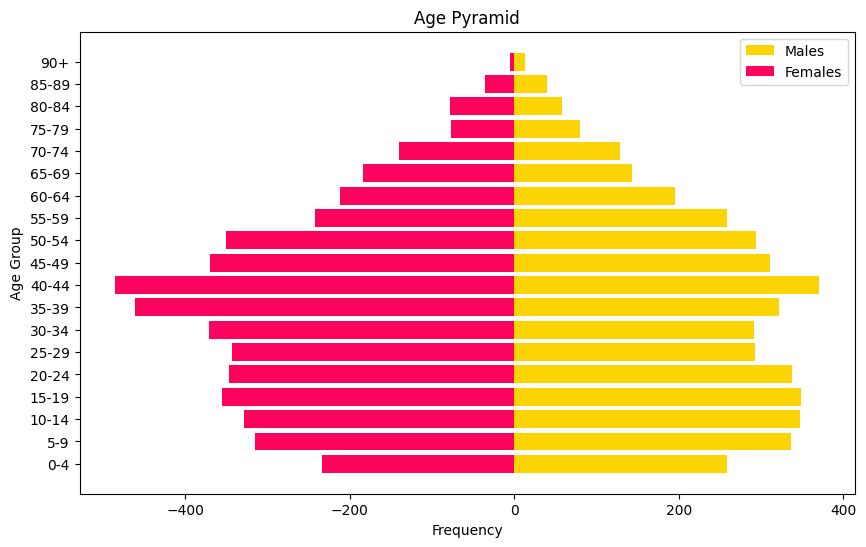

In [116]:
# Create age bins and labels
age_bins = [i for i in range(0, 100, 5)] 
age_labels = [f'{i}-{i + 4}' for i in range(0, 90, 5)]
age_labels.append('90+')

# Add age group column 
original_census_data['Age Group'] = pd.cut(original_census_data['Age'], 
                                           bins=age_bins, labels=age_labels, right=False)

# Create fig and ax objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each gender without subsetting dataframe twice
for gender, color in zip(['Male', 'Female'], ['#fcd303','#fc035e']):
    counts = original_census_data.loc[original_census_data['Gender'] == gender, 'Age Group'].value_counts().sort_index()
    ax.barh(counts.index, counts.values if gender=='Male' else -counts.values, 
            color=color, align='center')

# Set axis labels  
ax.set(xlabel='Frequency', ylabel='Age Group', title='Age Pyramid') 

# Add legend
ax.legend(['Males', 'Females'])

# Show plot
plt.show()

In [117]:
cleaned_census_data = original_census_data.copy()

### 1. Employment

In [118]:
pd.set_option('display.max_rows', None) #Display all elements of a collection
occupation_counts = cleaned_census_data['Occupation'].value_counts()
print(occupation_counts)

Occupation
Student                                                                1844
Unemployed                                                              649
University Student                                                      591
Child                                                                   494
PhD Student                                                              21
Health promotion specialist                                              18
Sports development officer                                               17
Medical secretary                                                        16
Holiday representative                                                   16
Engineer, civil (contracting)                                            16
Manufacturing systems engineer                                           15
Counsellor                                                               15
Surveyor, planning and development                                       15
I

In [119]:
# Get the total number of distinct occupations
num_of_unique_occupations = len(cleaned_census_data['Occupation'].unique())
num_of_unique_occupations

1095

In [120]:
# We categorise occupations into larger groups using some key words
# Occupation category lists
medical = ["doctor", "nurse", "physio", "pharmacist", "therapist", "verterinary", \
           "surgeon", "optometrist", "radiographer", "ergonomist"]
education = ["teacher", "professor", "lecturer", "tutor"] 
engineering = ["engineer", "architect", "surveyor"]
legal = ["lawyer", "legal", "solicitor"]
tech = ["computer", "developer", "programmer", "web designer", "graphic designer", "product designer"]
science_and_research = ["research", "science", "ologist", "scientist"]
media_and_ent = ["media", "journalist", "music", "dancer", r"\bactor\b",\
                 "advertising", "television", "film", "video", "animator"]
finance = ["trader", "accountant","accounting", "financial", "banker", "bank"]
art = ["curator", "museum", "gallery"]


# Function to check substrings
def categorize_occupation(title):
    title = title.lower()
    if 'retired' in title:
        return 'Retired'
    elif 'student' in title:
        return "Student"
    elif title == 'unemployed':
        return "Unemployed"
    elif title == 'child':
        return "Child"
    elif 'unemployed' in title:
        return "Unemployed"
    elif any(m in title for m in medical):
        return "Medical"
    elif any(e in title for e in education):
        return "Education"
    elif any(eng in title for eng in engineering):
        return "Engineering"
    elif any(l in title for l in legal):
        return "Legal"
    elif any(t in title for t in tech):
        return "Tech"
    elif any(sr in title for sr in science_and_research):
        return "Science & Research"
    elif any(me in title for me in media_and_ent):
        return "Media & Entertainment"
    elif any(f in title for f in finance):
        return "Finance"
    else:
        return "Other"

# Apply function 
cleaned_census_data["Occupation Category"] = cleaned_census_data["Occupation"].apply(categorize_occupation)

# We can match other occupation categories but this gives us an idea

In [121]:
cleaned_census_data.head(200)

House Number         Street First Name          Surname  Age  \
0               1   Allen Circle       John            Grant   43   
1               1   Allen Circle        Kim            Grant   37   
2               2   Allen Circle      Sally         Atkinson   44   
3               2   Allen Circle       Karl        Robertson   44   
4               2   Allen Circle      Tracy         Atkinson   24   
5               2   Allen Circle     Howard         Atkinson   13   
6               3   Allen Circle  Catherine          Bradley   44   
7               3   Allen Circle       Owen           Davies   50   
8               3   Allen Circle       Owen          Bradley   14   
9               3   Allen Circle       Neil          Bradley   10   
10              4   Allen Circle      Emily          Godfrey   29   
11              4   Allen Circle       Rita          Godfrey    0   
12              4   Allen Circle      Denis          Godfrey    0   
13              4   Allen Circle    Malcolm           Thomas   56   
14              5   Allen Circle    Gillian             Ward   44   
15              5   Allen Circle       Lucy             Ward   46   
16              5   Allen Circle        Max             Ward   11   
17              5   Allen Circle  Katherine             Ward   11   
18              6   Allen Circle   Beverley       Williamson   42   
19              6   Allen Circle      Craig       Williamson   42   
20              6   Allen Circle     Elaine       Williamson    4   
21              6   Allen Circle      Glenn       Williamson    1   
22              6   Allen Circle       June       Williamson    1   
23              7   Allen Circle        Kim          Simmons   57   
24              7   Allen Circle      Lewis          Griffin   58   
25              7   Allen Circle        Guy          Simmons   14   
26              7   Allen Circle  Catherine          Simmons   12   
27              8   Allen Circle    Maureen           Taylor   59   
28              8   Allen Circle    Charles            Smith   65   
29              8   Allen Circle       Luke           Taylor   20   
30              8   Allen Circle      Jason           Taylor   10   
31              9   Allen Circle      Shane              Cox   45   
32              9   Allen Circle       Leah              Cox   42   
33             10   Allen Circle     Norman             Todd   57   
34             10   Allen Circle      Helen             Todd   39   
35             10   Allen Circle   Danielle             Todd   34   
36             10   Allen Circle   Mohammad             Todd   31   
37             10   Allen Circle   Mohammed             Todd   28   
38             11   Allen Circle     Sophie          Mahmood   50   
39             11   Allen Circle    Melissa          Mahmood   24   
40             11   Allen Circle       Joan          Mahmood   21   
41             12   Allen Circle      Helen             Hall   43   
42             12   Allen Circle       Neil             Hall   12   
43             12   Allen Circle      Abbie             Hall    9   
44             12   Allen Circle     Cheryl             Hall    7   
45             12   Allen Circle  Alexander             Hall    1   
46             12   Allen Circle  Alexander          Chapman   31   
47             13   Allen Circle     Leanne            Baker   51   
48             13   Allen Circle      Terry            Baker   51   
49             13   Allen Circle   Benjamin            Baker   22   
50             13   Allen Circle   Kathleen            Baker   21   
51             14   Allen Circle      Katie            Jones   29   
52             14   Allen Circle       Emma            Jones    2   
53             14   Allen Circle       Tony          Doherty   34   
54             15   Allen Circle  Kimberley            Booth   61   
55             15   Allen Circle      Dylan          Johnson   32   
56             15   Allen Circle    Charles         Williams   24   
57 

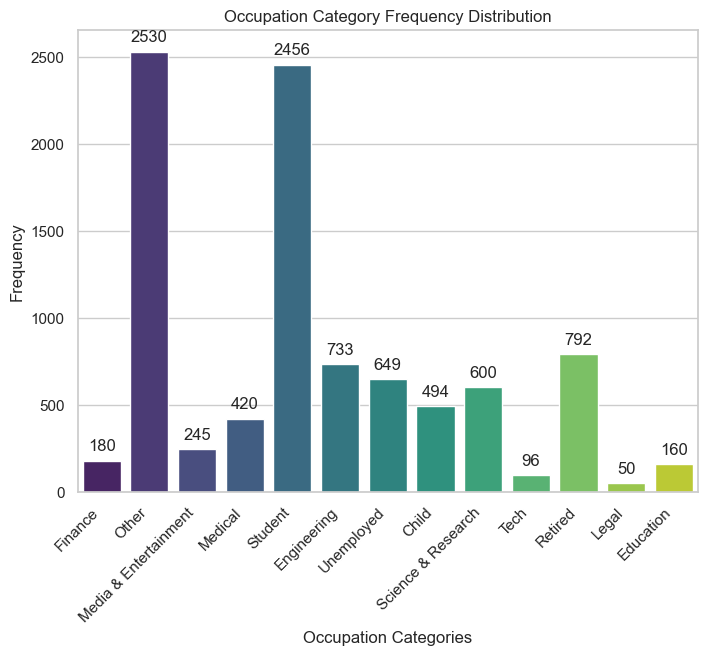

In [124]:
# Create a count plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Occupation Category', data=cleaned_census_data, palette='viridis')

# Add integer data labels vertically to each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', rotation='horizontal', xytext=(0, 5), textcoords='offset points')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# Add labels and title
plt.xlabel('Occupation Categories')
plt.ylabel('Frequency')
plt.title('Occupation Category Frequency Distribution')

# Show the plot
plt.show()

In [126]:
number_of_university_students = len(cleaned_census_data[(cleaned_census_data['Occupation'] == 'University Student') | (cleaned_census_data['Occupation'] == 'PhD Student')])
number_of_university_students

612

### Unemployment Rate

In [127]:
# Unemployment_rate = (unemployed_people/labour_force) x 100

unemployed_people = cleaned_census_data.loc[cleaned_census_data['Occupation'] == 'Unemployed']
total_unemployed = len(unemployed_people)
labour_force = cleaned_census_data.loc[(cleaned_census_data['Age'] >= 18)\
                                       & (cleaned_census_data['Occupation Category'] != 'Retired')]
total_labour_force = len(labour_force)

unemployment_rate = round((total_unemployed/total_labour_force) * 100, 2)
print(f'Unemployment rate: {unemployment_rate}%')

Unemployment rate: 10.17%


In [128]:
# Find the modal child age
modal_unemployment_age_group = unemployed_people['Age Group'].mode().iloc[0]
modal_frequency = unemployed_people['Age Group'].value_counts().max()
percentage_of_total = round((modal_frequency/total_unemployed) * 100 ,2)

# Print the mode
print("Modal unemployment age group':", modal_unemployment_age_group)
print("Frequency:", modal_frequency)
print("Percentage:", percentage_of_total)

Modal unemployment age group': 40-44
Frequency: 99
Percentage: 15.25


C:\Program Files\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


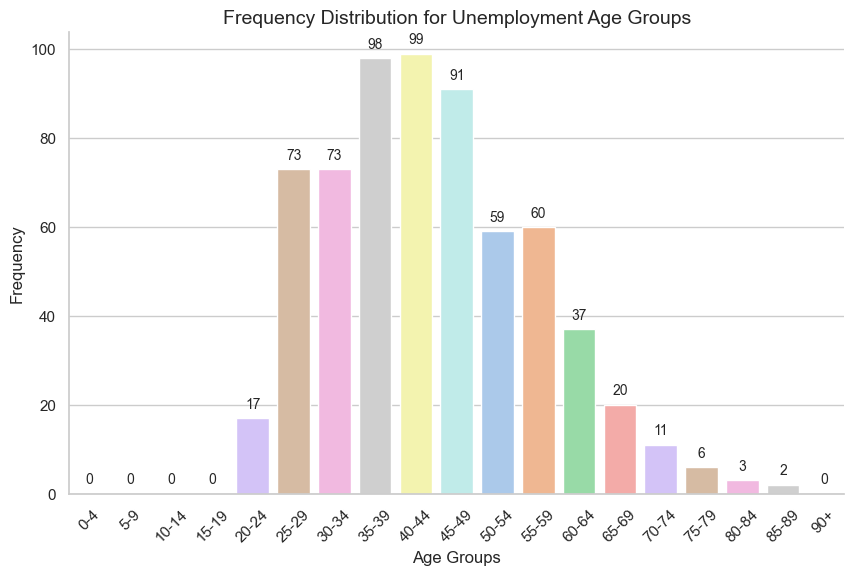

In [129]:
# Set a custom color palette
custom_palette = sns.color_palette("pastel")

# Create a bar plot with Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Age Group', data=unemployed_people, palette=custom_palette)

# Add data labels above each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', fontsize=10)

# Customize the appearance
ax.set_xlabel('Age Groups', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Frequency Distribution for Unemployment Age Groups', fontsize=14)
ax.tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels for better readability

# Remove top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.show()


### Religious Affiliations

In [130]:
cleaned_census_data = original_census_data.copy() #Checkpoint

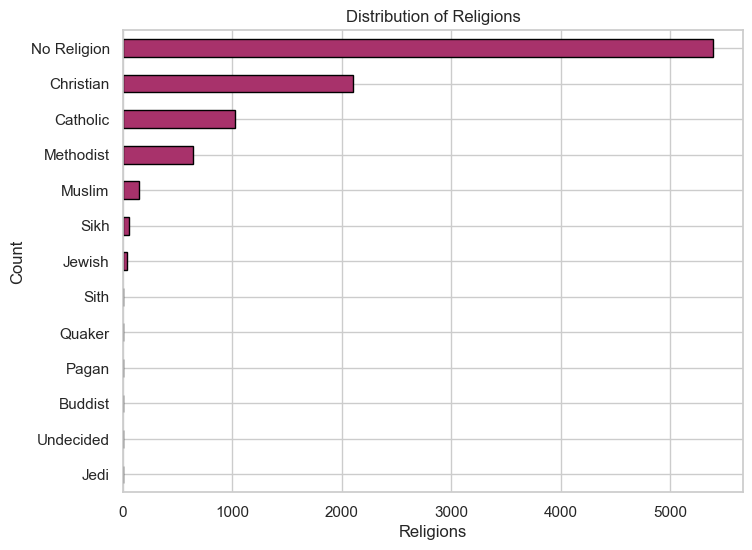

In [131]:
# Plot the distribution of the 'Category' column
plt.figure(figsize=(8, 6))
original_census_data['Religion'].value_counts().sort_values().plot(kind='barh', color='#a8326b', edgecolor='black')
plt.title('Distribution of Religions')
plt.xlabel('Religions')
plt.ylabel('Count')
plt.show()

### Divorce and Marriage rates

In [132]:
original_census_data['Marital Status'].unique()

array(['Married', 'Single', 'Not Applicable', 'Widowed', 'Divorced'],
      dtype=object)

In [133]:
married = original_census_data.loc[original_census_data['Marital Status'] == 'Married']
number_of_married = len(married)
singles = original_census_data.loc[original_census_data['Marital Status'] == 'Single']
number_of_single = len(singles)
divorced = original_census_data.loc[original_census_data['Marital Status'] == 'Divorced']
number_of_divorced = len(divorced)
widows = original_census_data.loc[original_census_data['Marital Status'] == 'Widowed']
number_of_widows = len(widows)

# Marriage Rate = (Number of Marriages / Population) x 1,000

marriage_rate = round(((number_of_widows + (number_of_married/2)) / len(original_census_data)) * 1000)
print(f'Marriage rate is {marriage_rate} per 1000')

# Marriage Rate = (Number of Divorcees / Marriage Population) x 1,000
divorce_rate = round(number_of_divorced/(number_of_married + number_of_divorced + number_of_widows)*1000)
print(f'Divorce rate is {divorce_rate} per 1000')

Marriage rate is 183 per 1000
Divorce rate is 221 per 1000


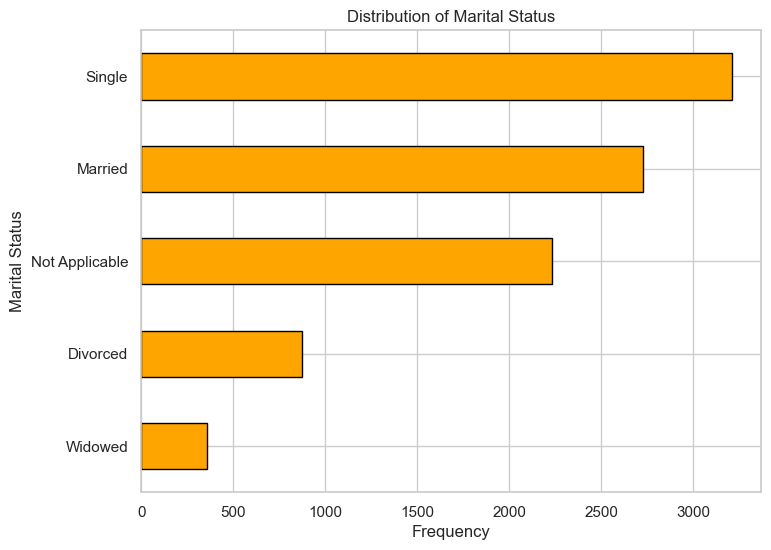

In [134]:
# Plot the distribution of the 'Marital Status' column
plt.figure(figsize=(8, 6))
original_census_data['Marital Status'].value_counts().sort_values().plot(kind='barh', color='orange', edgecolor='black')
plt.title('Distribution of Marital Status')
plt.ylabel('Marital Status')
plt.xlabel('Frequency')
plt.show()

### Occupancy Level

In [135]:
cleaned_census_data = original_census_data.copy()

In [136]:
# Total number of houses is determined by the number of house heads in the data

heads_of_houses = original_census_data.loc[original_census_data['Relationship to Head of House'] == 'Head']
number_of_houses = len(heads_of_houses)
total_population = len(original_census_data)

occupancy_level = round(total_population/number_of_houses)

occupancy_level

3

### Birth and death rates

In [137]:
# Since the population census is carried out every 10 years, 
# we can calculate the birth rate by dividing the total number of births
# within the last 10 years by the total population
# We do not have information about total number of deaths

In [138]:
newborns = original_census_data.loc[(original_census_data['Age Group'] == '0-4')|(original_census_data['Age Group'] == '5-9')]
total_births = len(newborns)

birth_rate = round((total_births/total_population)*1000, 2)
print(f'Birth rate: {birth_rate} births per thousand')

Birth rate: 121.74 births per thousand


### Health & Fitness

In [139]:
cleaned_census_data = original_census_data.copy()

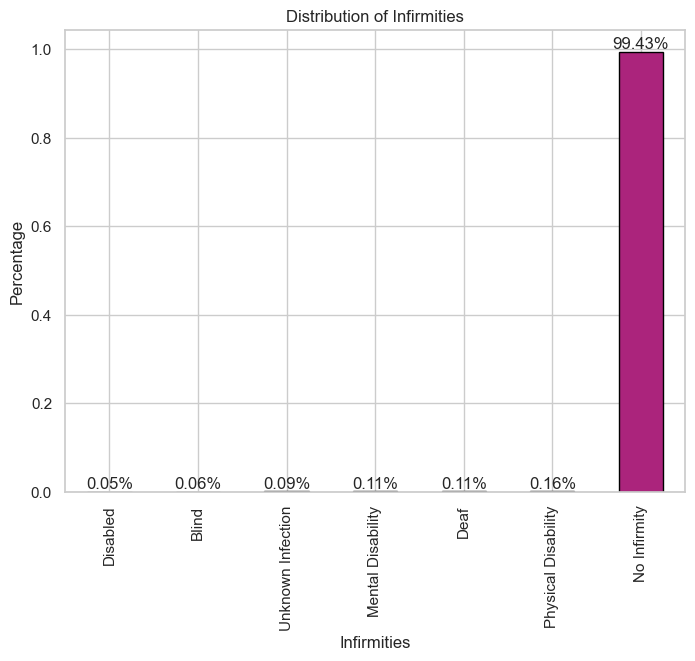

In [140]:
# Plot the data
plt.figure(figsize=(8, 6))
ax = original_census_data['Infirmity'].value_counts(normalize=True).sort_values().plot(kind='bar', color='#ab247c', edgecolor='black')

# Annotate each bar with the percentage
for p in ax.patches:
    percentage = '{:.2%}'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

# Plot titles and labels
plt.title('Distribution of Infirmities')
plt.xlabel('Infirmities')
plt.ylabel('Percentage')

# Show the plot
plt.show()

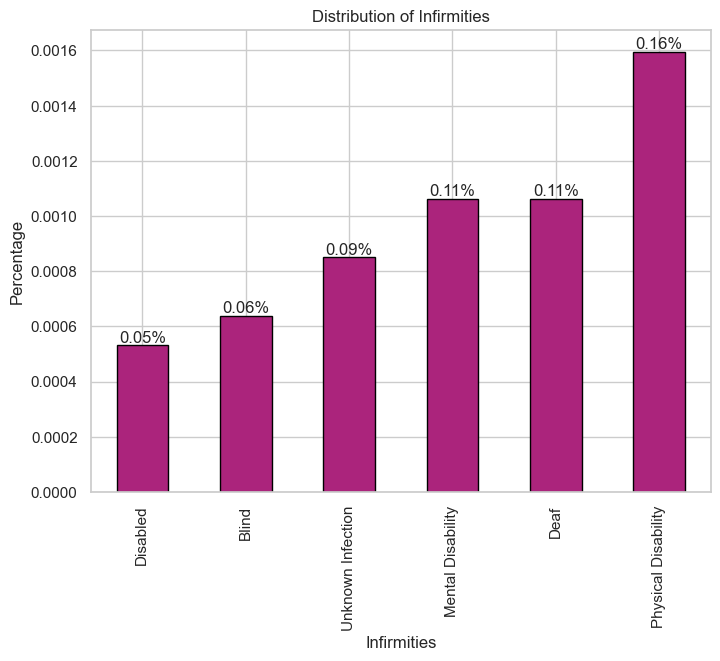

In [141]:
# Plot the data
plt.figure(figsize=(8, 6))
ax = original_census_data['Infirmity'].value_counts(normalize=True).sort_values().drop('No Infirmity').plot(kind='bar', color='#ab247c', edgecolor='black')

# Annotate each bar with the percentage
for p in ax.patches:
    percentage = '{:.2%}'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

# Plot titles and labels
plt.title('Distribution of Infirmities')
plt.xlabel('Infirmities')
plt.ylabel('Percentage')

# Show the plot
plt.show()
